# Regresion Lineal
Trabajo a realizar:
Se requiere de un modelo que proponga un valor de cantidad de unidades de compra para cada producto. El modelo permitirá realizar una prediccion de venta para el año 2020 en adelante de la cantidad de productos que se estiman se venderan en ese periodo. 

In [65]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from IPython.display import clear_output

In [66]:
#Lectura del CSV
df_compra = pd.read_csv("../Datasets/Compra.csv", sep=",", parse_dates=["Fecha"])

In [67]:
df_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   IdCompra       11539 non-null  int64         
 1   Fecha          11539 non-null  datetime64[ns]
 2   Fecha_Año      11539 non-null  int64         
 3   Fecha_Mes      11539 non-null  int64         
 4   Fecha_Periodo  11539 non-null  int64         
 5   IdProducto     11539 non-null  int64         
 6   Cantidad       11539 non-null  int64         
 7   Precio         11172 non-null  float64       
 8   IdProveedor    11539 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 811.5 KB


In [105]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip &> /dev/null # "&> /dev/null" is used so that the installation process does not display output text, as it is extensive.

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip
El sistema no puede encontrar la ruta especificada.


In [109]:
import requests
import io
import numpy as np
from pandas_profiling import ProfileReport

In [108]:
pip install ipywidgets


     -------------------------------------- 138.3/138.3 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 198.2/198.2 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
Closed_deals_report = ProfileReport(df_compra)
print('\033[1mReport of Closed_deals_ dataset \033[0m\n')
Closed_deals_report

Report of Closed_deals_ dataset 



Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


In [102]:
pip install pandas_profiling

     -------------------------------------- 324.4/324.4 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 345.9/345.9 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 102.7/102.7 kB 2.9 MB/s eta 0:00:00
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 296.5/296.5 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 663.4/663.4 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 2.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
translators 5.7.0 requires tqdm>=4.65.0, but you have tqdm 4.64.1 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Se realiza un Filtro con los campos que se van a utilizar. 

In [100]:

df_compra = df_compra[['Fecha','IdProducto','Cantidad','Fecha_Año','Fecha_Mes','Fecha_Periodo']]

# Se ordena el DF primero por la columna 'IdProducto' y luego por la columna 'Fecha'.
df_compra.sort_values(['IdProducto','Fecha'], inplace = True)
# se reindexa a valores originales.
df_compra.reset_index(inplace = True, drop  = True)
df_compra.head()

,Fecha,IdProducto,Cantidad,Fecha_Año,Fecha_Mes,Fecha_Periodo
0,2015-01-30,42737,2,2015,1,201501
1,2015-05-29,42737,8,2015,5,201505
2,2015-06-26,42737,9,2015,6,201506
3,2015-07-31,42737,5,2015,7,201507
4,2015-08-28,42737,10,2015,8,201508


Visualizamos el comportamiento de los datos de un único producto aleatorio.
Se utilizaá el producto con  ID número 42880

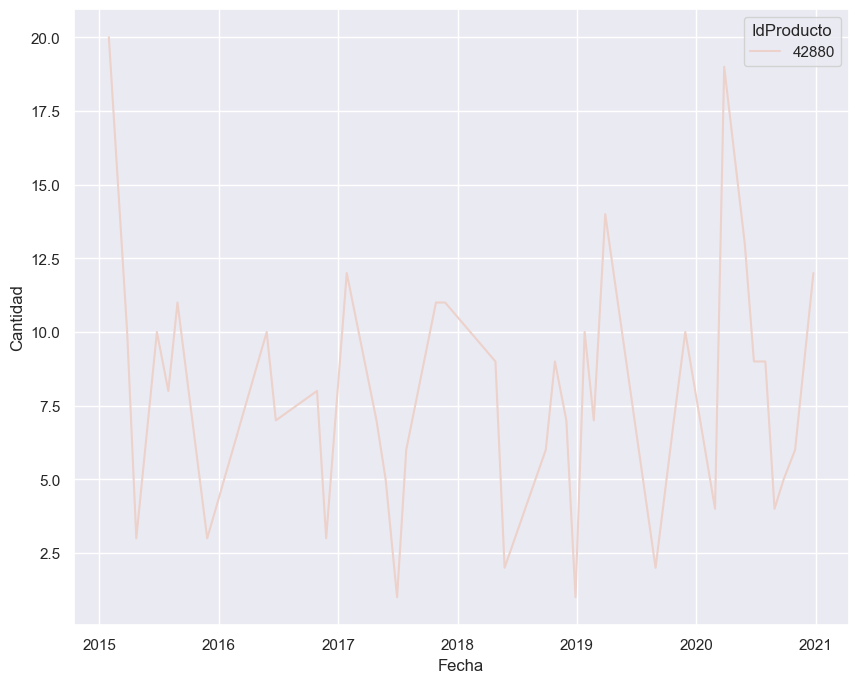

In [72]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Fecha', y = 'Cantidad', data = df_compra[df_compra.IdProducto == 42880], hue = 'IdProducto')
plt.show()

Convertimos el campos Fecha a un valor numérico para utilizarlo como input al modelo de regresión. Para poder utilizar cualquier modelo de ML debemos realizar una formalizacion numerica de los datos. Por lo que con la siguiente funcion se pasará de un formato fecha a un formato numerico. 

In [101]:
import datetime as dt
df_compra['Fecha_Numerico']=df_compra['Fecha'].map(dt.datetime.toordinal)
df_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           11539 non-null  datetime64[ns]
 1   IdProducto      11539 non-null  int64         
 2   Cantidad        11539 non-null  int64         
 3   Fecha_Año       11539 non-null  int64         
 4   Fecha_Mes       11539 non-null  int64         
 5   Fecha_Periodo   11539 non-null  int64         
 6   Fecha_Numerico  11539 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 631.2 KB


In [74]:
# Aqui se instancian las variables, es decir se le asignan valores
# especificos a las variables x e y respectivamente con 2 filtros, id y Fecha_Año, 
#las 2 variables graficadas son Fecha Numerico y Cantidad.
x = df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Año == 2020)].Fecha_Numerico
y = df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Año == 2020)].Cantidad

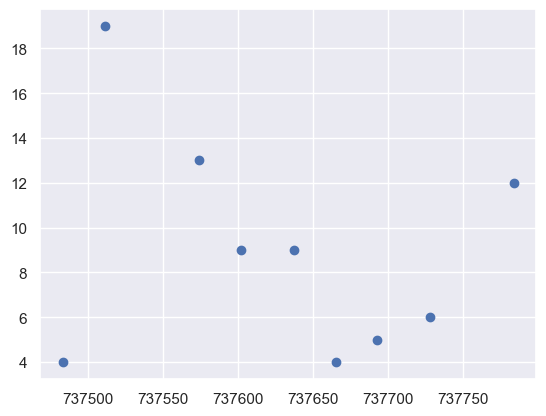

In [75]:
# Ploteamos
plt.scatter(x, y)
plt.show()

In [76]:
#Se saca la correlacion de las variables
#podemos apreciar que sin el filtro temporal la correlacion es muy baja. 
#Del -0.03
df_compra[(df_compra.IdProducto == 42880)][['Fecha_Numerico','Cantidad']].corr()

,Fecha_Numerico,Cantidad
Fecha_Numerico,1.000000,-0.039009
Cantidad,-0.039009,1.000000


In [77]:
#Una vez aplicado el filtro, la correlacion aumenta significativamente a un 0.23
# Cabe aclarar que este nivel de correlacion(tambien visualizable en el mapa de calor)
# nos indica que el nivel de correlacion entre estas variables es minimos, por ende aun que 
# continuare con el ejercisio, su utilidad es baja. ya que una varibale y la otra tiene escaza correlacion.

df_compra[(df_compra.IdProducto == 42880) & (df_compra.Fecha_Año >= 2020)][['Fecha_Numerico','Cantidad']].corr()

,Fecha_Numerico,Cantidad
Fecha_Numerico,1.000000,-0.237111
Cantidad,-0.237111,1.000000


In [78]:
#Se importa SKlearn
from sklearn.linear_model import LinearRegression

La separación entre los datos de entrenamiento y prueba, lo hacemos en base a períodos

In [87]:
#La division de x e y Train y, x e y Test se realizará por periodos, 2019 Ene a 2020 Ago, usando de Test los siguientes
X_train = df_compra[ (df_compra.Fecha_Periodo >= 201901) & (df_compra.Fecha_Periodo < 202008)].Fecha_Numerico.values
y_train = df_compra[ (df_compra.Fecha_Periodo >= 201901) & (df_compra.Fecha_Periodo < 202008)].Cantidad.values
X_test = df_compra[ (df_compra.Fecha_Periodo >= 202008)].Fecha_Numerico.values
y_test = df_compra[ (df_compra.Fecha_Periodo >= 202008)].Cantidad.values

In [88]:
#se utilizan para cambiar la forma de los arrays X_train y X_test de matrices bidimensionales
#a matrices unidimensionales, lo que facilita su procesamiento y análisis 
#Menos uno en esta funcion devuelve el valor necesario para transformar la matriz, cumpliendo
#en este caso con la condicion de 1 dimension en el segundo termino. 
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

# Interceptacion
True: La intercepción representa el valor de la variable dependiente (y) cuando todas las variables independientes (x) son iguales a cero. Por lo tanto, si la intercepción se incluye en el modelo, se está asumiendo que existe una relación lineal entre las variables independientes y la variable dependiente, incluso si todas las variables independientes son cero.

False: Por otro lado, si se establece fit_intercept=False, se está asumiendo que la línea de regresión debe pasar por el origen (0,0) y que no hay una intercepción adicional que deba ser considerada.

In [89]:
#Se define el modelo a usar, asumimos una relacion entre las variables
modelo = LinearRegression(fit_intercept=True)

In [90]:
#Se entrena le modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [91]:
#Se define su coeficiente de la contribución relativa de cada variable independiente 
#en la predicción de la variable de respuesta
modelo.coef_

array([-0.00120073])

# El Error Cuadrático Medio (MSE)
El código proporcionado está utilizando la función mean_squared_error de la biblioteca sklearn.metrics para calcular el error cuadrático medio (MSE) entre los valores predichos y los valores reales en los datos de entrenamiento y prueba.

El MSE es una métrica comúnmente utilizada para evaluar la calidad de los modelos de regresión. Mide la diferencia promedio entre los valores reales y los valores predichos al cuadrado. El MSE se calcula sumando los errores al cuadrado y dividiendo el resultado por el número total de muestras. Por lo tanto, cuanto menor sea el valor del MSE, mejor será el rendimiento del modelo.

En el código, primero se utilizan las predicciones del modelo (modelo.predict) en los datos de entrenamiento y prueba (X_train y X_test) para obtener y_train_pred y y_test_pred, respectivamente. Luego, se calcula el MSE entre los valores reales (y_train y y_test) y las predicciones (y_train_pred y y_test_pred) utilizando la función mean_squared_error y se imprimen los resultados en la consola.Evaluamos el error

In [92]:
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 46.524321187250955
Error en datos de test: 24.562640057222094


# El coeficiente de determinación R2:
 Es una medida que varía entre 0 y 1,es una medida estadística utilizada para evaluar la calidad de un modelo de regresión. R2 mide la proporción de la varianza en la variable dependiente que puede explicarse por el modelo. Un valor de R2 cercano a 1 indica un buen ajuste del modelo a los datos, mientras que un valor cercano a 0 indica un ajuste pobre. 

In [99]:
from sklearn.metrics import r2_score
#calcula el coeficiente de determinación R2
r2 = r2_score(y_test, y_test_pred)
print('El coeficiente de determinación del regresor es:', r2)
# Podemos ver que el coeficiente es extremadamente alto, debiendo re-ajustar
# el modelo por su escazo nivel de predictibilidad. 
#el valor de 

El coeficiente de determinación del regresor es: -1.3910054279649229


Graficamos

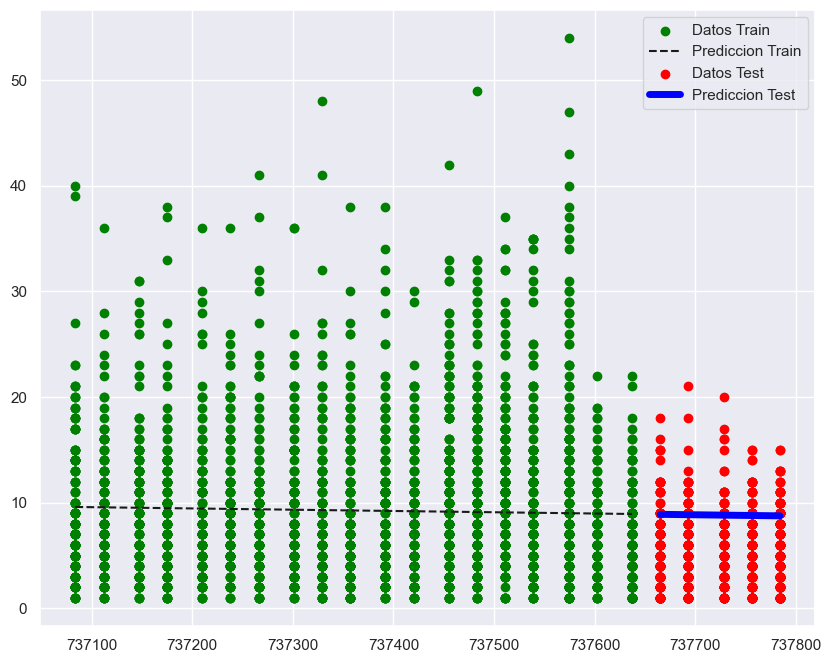

In [ ]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.legend()
plt.show()

Establecemos una fecha real para la cual queremos hacer la predicción y usamos el modelo

In [ ]:
from datetime import datetime
fecha_prediccion = '2021-01-01'

In [ ]:
fecha_prediccion = datetime.strptime(fecha_prediccion, '%Y-%m-%d').date()

In [ ]:
# Convertir la fecha a un número ordinal 
fecha_prediccion = fecha_prediccion.toordinal()
#fecha_prediccion = datetime.fromordinal(fecha_prediccion)
# se convierte en array
fecha_prediccion = np.array(fecha_prediccion)
# se le da una dimension para ser analizado
fecha_prediccion = fecha_prediccion.reshape(-1,1)

In [111]:
#Se instancia la prediccion en uan varibale. 
cantidad_prediccion = modelo.predict(fecha_prediccion)
# Se imprime el primer elemento redondeado a dos digitos.
print('La cantidad que se predice es :' + str(round(cantidad_prediccion[0],2)))

La cantidad que se predice es :8.75
